# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

# Salary Predictions Based on Job Descriptions

### ---- 1 Define the problem ----

<b>Project Goal:</b>
- The goal of this project is to examine the dataset of job postings, and predict salaries for a new set of postings. - This will involve building a model to predict the salaries given in the test dataset.

<b>Practical use:</b>
- HR Department of a large company or a Consulting groups that needs real-time solutions in order to make effective employment offers to potential hires.

- It also finds use in getting to understand current realities in the job market and how businesses can leverage this in order to secure high quality talent, while keeping recuritment cost low.

- The primary tool used for this project is Python 3, along with an extensive array of libraries and packages available for the manipulation of data,and development of predictive modeling algorithms.

<b>Project Structure:<b>

<b>Defining the Problem:</b>
Creating "Data" and "Plots" classes and objects to aid us in extracting, manipulating the given data
Exploratory Data Analysis
This involves looking at the Data Summaries and Visualizations in order to:

Examine the Data
Discover patterns and relationships between the features
Identify the types of data
Clean up the Data
Creating classes and objects for Feature Engineering, and Model Selection
This will help us preprocess and create new features from existing ones. Here we shall also select the best model for prediction. The algorithms chosen for this are:

Linear Regression
Random Forest Regressor
Gradient Boosting Regressor
The Evaluation metric used for these models is the Mean Squared Error.

Also we shall look at the Feature Importances, and how each feature performs with the best model selected in making predictions.

Saving the results for Deployment
Defining the problem
Our twofold goal in this project is to:

Load and Explore Data
Develop and train a suitable prediction model

In [56]:
#import necessary required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
#etc

#Author info
__author__ = "Ganesh Dnyaneshwar Dhasade"
__email__ = "g.dhasade16@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

- Received data having 2 files 
    1. Contains job features 
    2. Contains salaries for each job.
- In both sheets, JobID is common column
- First we import both files and merge them into one single dataframe with reference to jobID

In [4]:
#load the data into a Pandas dataframe
DataFrame1 = pd.read_csv("/Users/ganesh_dhasade/Documents/DSDJ/Salary_Prediction_Project/SalaryPredictionProject/data/train_features.csv")
DataFrame2 = pd.read_csv("/Users/ganesh_dhasade/Documents/DSDJ/Salary_Prediction_Project/SalaryPredictionProject/data/train_salaries.csv")
TestData = pd.read_csv("data/test_features.csv")
#Megre both dataframe into one
CompleteDataFrame = DataFrame1.merge(DataFrame2, on='jobId')


### ---- 3 Clean the data ----

### Function to reduce similar line of codes

In [5]:
class DataFrameInfo:
    def __init__(self, DataFrame, target_col, DFType):
        self.DataFrame = DataFrame
        self.target_col = target_col
        self.DFType = DFType
        self.Process_Data()
    
    def Process_Data(self):
        
        self.Check_Type_Of_Features_Info()
        self.Check_Duplicate_Data()
        self.Check_Shape()
        self.Check_Null()
        if(self.DFType == 'Train'):
            self.Check_Invalid_Data()

        
    def Check_Invalid_Data(self):
        InvCount=0
        for i in self.DataFrame[self.target_col]:
            if(i <= 0 ):
                InvCount = InvCount + 1
        print('\n-------------------------- Invalid data Information -------------------------------------')
        print("There are {} invalid salaries i.e contains 0".format(InvCount))

    def Check_Duplicate_Data(self):
        count = self.DataFrame.duplicated().sum()
        print('\n-------------------------- Duplicate values Information -------------------------------------')
        print("There are {} duplicate values in dataset.".format(count))
    
    
    def Check_Type_Of_Features_Info(self):
        '''Categorical Col. in DataFrame'''
        print('\n-------------------------- Categorical Features Information -------------------------------------')
        Cat_Cols = self.DataFrame.select_dtypes(include=['O']).columns.tolist()
        print('Categorical Columns list: {}'.format(Cat_Cols))
        print('\n\nColumns info: \n{}'.format(self.DataFrame.describe(include='O')))

        print('\n\n-------------------------- Numerical Features Information----------------------------')
        Num_Cols = self.DataFrame.select_dtypes(exclude=['O']).columns.tolist()
        print('Numerical Columns list: {}'.format(Num_Cols))
        print('\n\nColumns info: \n{}'.format(self.DataFrame.describe()))
    
    def Check_Shape (self):
        print('\n-------------------------- Shape of DataFrame -------------------------------------')
        print('The shape of dataframe is \n{}'.format(self.DataFrame.shape))

    def Check_Null (self):
        CountSumNull = np.sum(self.DataFrame.isna().sum())
        CountNull = self.DataFrame.isnull().sum()
        print('\n-------------------------- Null values in DataFrame Information -------------------------------------')
        if(CountSumNull == 0):
            print("There are zero null values in dataframe.")
        else:
            print("There are null values in below mention columns in dataframe.".format(CountNull))
        


In [61]:
from matplotlib import *
import sys
import pylab as pl
class DataVisualization:
    sns.set(style="darkgrid")
    def __init__ (self, DataFrame, Num_Cols, Cat_Cols,target_col):
        self.DataFrame =  DataFrame
        self.Num_Cols = Num_Cols
        self.Cat_Cols = Cat_Cols
        self.target_col = target_col
        self.VisualiseDataFrame()
        
    def VisualiseDataFrame(self):
        self.Histograms()
        self.BoxPlot()
        
    def Histograms(self):    
        print('\n-------------------------- Data Distribution Histograms -------------------------------------')
        fig = plt.figure(figsize=(14, 14))
        for index, col in enumerate(self.Num_Cols):
            fig.add_subplot(len(self.Num_Cols), len(self.Num_Cols), index+1)
            sns.distplot(self.DataFrame[col], bins=20,color='g')
            plt.title('Distribution Plot')
            plt.tight_layout()
    
    def BoxPlot(self):
        #https://mode.com/python-tutorial/python-histograms-boxplots-and-distributions/
        #df = self.train_df.copy()
        fig = plt.figure(figsize=(14, 18))
        for index, col in enumerate(self.Cat_Cols):
            if len(self.DataFrame[col].unique()) < 10:
                DataFrame[col + '_mean'] = DataFrame.groupby(col)[self.target_col].transform('mean')
                fig.add_subplot(3, 2, index+1)
                sns.boxplot(x=col, y=self.target_col, data=DataFrame.sort_values(col + '_mean'))
                plt.title('Salaries vs {}'.format(col), fontsize=12)
                plt.tight_layout()
                plt.xticks(rotation=45)
        for index, col in enumerate(self.Num_Cols):
            fig.add_subplot(len(col), len(self.Num_Cols), index+1)
            sns.boxplot(self.DataFrame[col], color='r')
            plt.tight_layout()


-------------------------- Data Distribution Histograms -------------------------------------


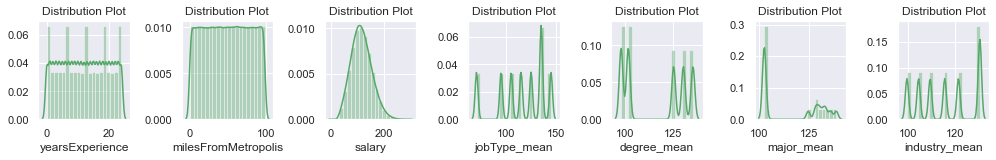

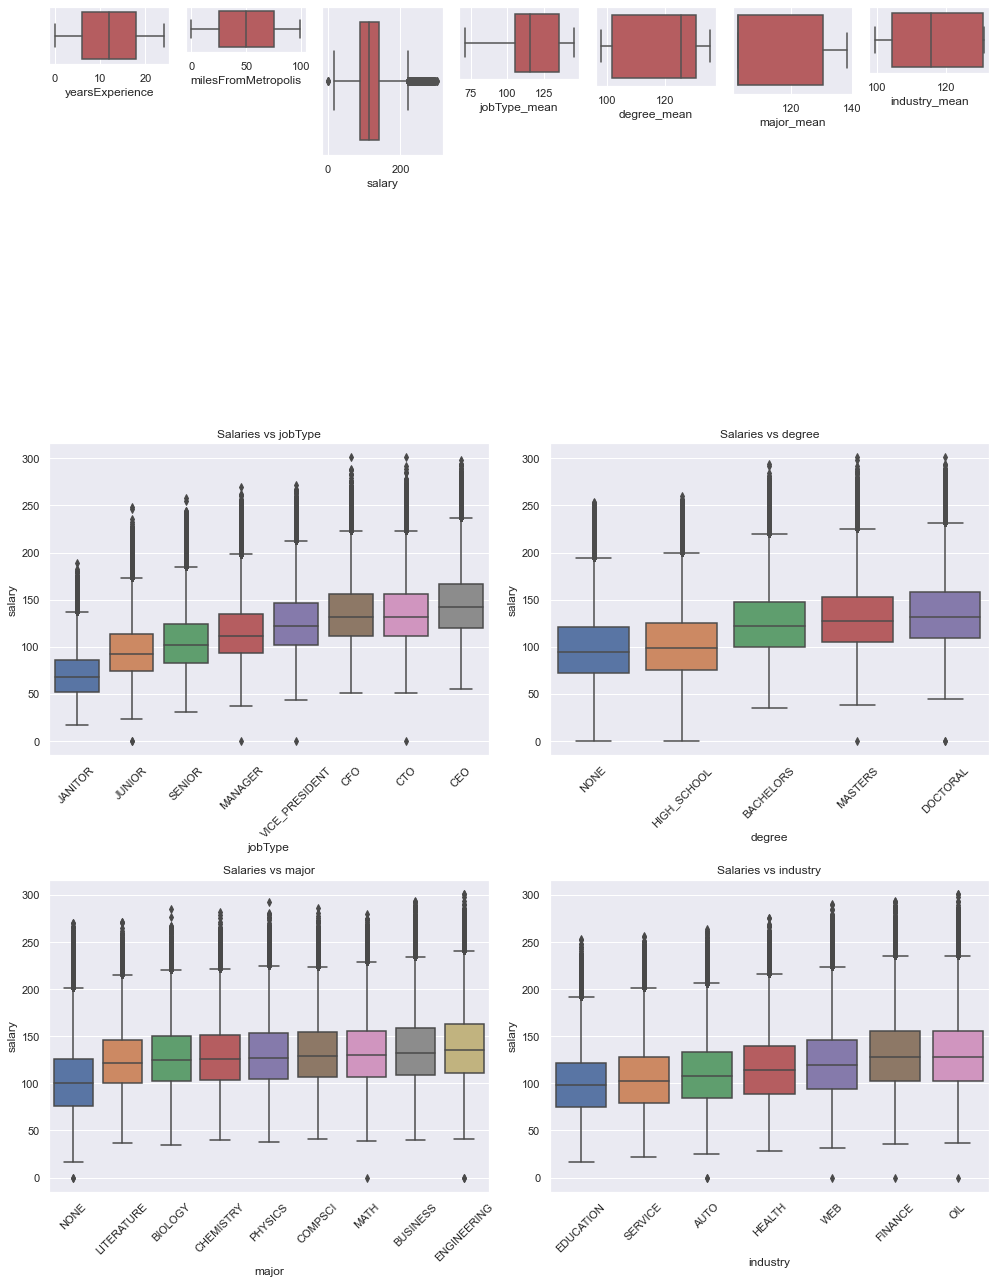

In [62]:
Num_Cols = CleanDataFrame.select_dtypes(exclude=['O']).columns.tolist()
Cat_Cols = CleanDataFrame.select_dtypes(include=['O']).columns.tolist()
target_col = 'salary'
DataVisualization1 = DataVisualization(CleanDataFrame,Num_Cols,Cat_Cols,target_col)

### ---- Train Dataset -----

In [8]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
CleanDataFrame = CompleteDataFrame.copy()

In [9]:
DataFrame = CleanDataFrame
target_col = 'salary'
DFType = 'Train'
DataFrameInfo1 = DataFrameInfo(DataFrame, target_col,DFType)



-------------------------- Categorical Features Information -------------------------------------
Categorical Columns list: ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']


Columns info: 
                   jobId companyId  jobType       degree    major industry
count            1000000   1000000  1000000      1000000  1000000  1000000
unique           1000000        63        8            5        9        7
top     JOB1362685265181    COMP39   SENIOR  HIGH_SCHOOL     NONE      WEB
freq                   1     16193   125886       236976   532355   143206


-------------------------- Numerical Features Information----------------------------
Numerical Columns list: ['yearsExperience', 'milesFromMetropolis', 'salary']


Columns info: 
       yearsExperience  milesFromMetropolis          salary
count   1000000.000000       1000000.000000  1000000.000000
mean         11.992386            49.529260      116.061818
std           7.212391            28.877733       38.717

# Initial Observations
- There are no null values in train dataset
- 6 categorical vairables
- 3 continous vairables
- 5 rows in salary column contains zero (need to handle)

# ---- Test Data ---

In [225]:
DataFrame = TestData
target_col = 'salary'
DFType = 'Test'
DataFrameInfo1 = DataFrameInfo(DataFrame, target_col,DFType)


-------------------------- Categorical Features Information -------------------------------------
Categorical Columns list: ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']


Columns info: 
                   jobId companyId         jobType       degree    major  \
count            1000000   1000000         1000000      1000000  1000000   
unique           1000000        63               8            5        9   
top     JOB1362685980165    COMP13  VICE_PRESIDENT  HIGH_SCHOOL     NONE   
freq                   1     16130          125434       238255   534068   

       industry  
count   1000000  
unique        7  
top     SERVICE  
freq     143161  


-------------------------- Numerical Features Information----------------------------
Numerical Columns list: ['yearsExperience', 'milesFromMetropolis']


Columns info: 
       yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.21

# Initial Observations
- There are no null values in test dataset
- 6 categorical vairables same as train dataset
- 2 continous vairables

### Train and test dataset is ready, now we can perform EDA.

### ---- 4 Explore the data (EDA) ----

In [3]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data